# Análise multivariada

## Preparando o ambiente

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import json

## Carregando os dados

In [25]:
dataset = pd.read_csv('../data/complete_dataset_region/complete_dataset_region.csv')
dataset.head()

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
0,afghanistan,asia,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,2008
1,afghanistan,asia,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,2009
2,afghanistan,asia,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,2010
3,afghanistan,asia,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,2011
4,afghanistan,asia,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,2012


## Matriz de correlação

In [26]:
dataset.corr()

,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
score,1.000000,0.786760,0.710903,0.742423,0.524903,0.171968,-0.423622,0.526402,-0.305731,0.037531
gdp,0.786760,1.000000,0.689782,0.834704,0.362880,-0.013398,-0.339782,0.299136,-0.224299,0.074857
social_support,0.710903,0.689782,1.000000,0.620191,0.412178,0.049919,-0.220744,0.429108,-0.403003,-0.006371
hle,0.742423,0.834704,0.620191,1.000000,0.388563,0.007027,-0.320664,0.309012,-0.147952,0.165953
freedom,0.524903,0.362880,0.412178,0.388563,1.000000,0.305791,-0.472828,0.602394,-0.267733,0.227725
generosity,0.171968,-0.013398,0.049919,0.007027,0.305791,1.000000,-0.278279,0.334181,-0.077491,-0.036023
corruption,-0.423622,-0.339782,-0.220744,-0.320664,-0.472828,-0.278279,1.000000,-0.285842,0.259155,-0.074125
positive_affect,0.526402,0.299136,0.429108,0.309012,0.602394,0.334181,-0.285842,1.000000,-0.372828,-0.001139
negative_affect,-0.305731,-0.224299,-0.403003,-0.147952,-0.267733,-0.077491,0.259155,-0.372828,1.000000,0.209917
year,0.037531,0.074857,-0.006371,0.165953,0.227725,-0.036023,-0.074125,-0.001139,0.209917,1.000000


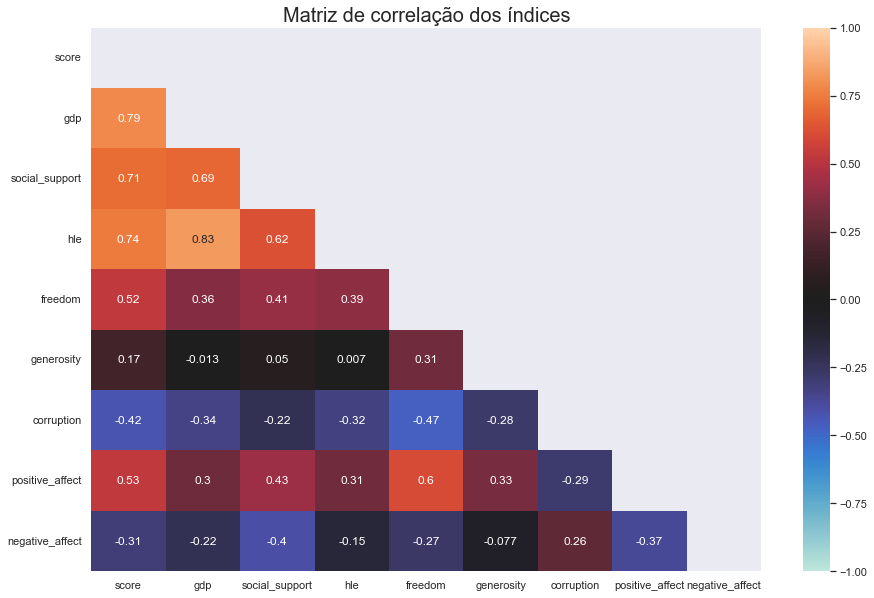

In [73]:
no_year = dataset.drop(columns=['year'])
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(no_year.corr(), annot=True, vmin=-1, vmax=1, center=0, mask=np.triu(no_year.corr()))
plt.title('Matriz de correlação dos índices', fontsize=20)

plt.show()

* As correlações faze sentido na realidade, expecialmente no score: `positive_affect` tem correlação positiva enquanto `negative_affect` tem correlação negativa.
* GDP tem uma correlação grande com o score, a segunda maior correlação presente nos dados depois da expectativa de vida. Ambas correlações positivas dentro do esperado.
* Não existe nenhuma correlação extremamente positiva ou negativa, o que evita com que variáveis sejam removidas por causa disso. 
* A variável com menor correlação total é o ano.

## Relação entre o score e o número de pesquisas realizadas pelo país

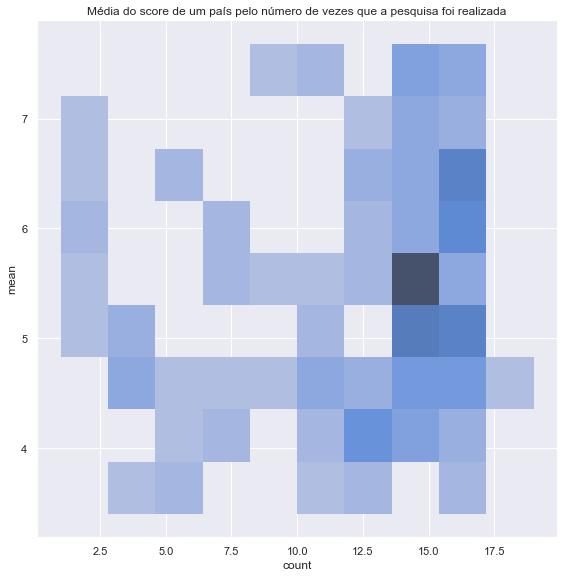

In [28]:
score_by_country_cout = dataset.groupby('country').describe()['score'][['count', 'mean']]

sns.displot(data=score_by_country_cout, x="count", y="mean", height=8)
plt.title('Média do score de um país pelo número de vezes que a pesquisa foi realizada')
plt.show()


Não parece apresentar qualquer relação entre esses dois elementos. Existe correlação?

In [29]:
score_by_country_cout.corr()

,count,mean
count,1.000000,0.171844
mean,0.171844,1.000000


A correlação entre o score e o número de vezes que aparece um país é baixa, praticamente irrelevante.

## Relação entre o score e o número de pesquisas realizadas por região

Parte dessa observação ajuda a verificar bias nos dados de percepção de vida para regiões com mais países.

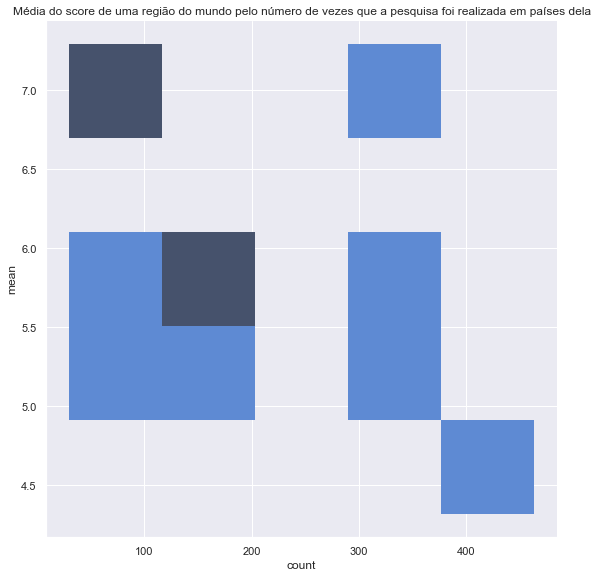

In [30]:
score_by_region_cout = dataset.groupby('region').describe()['score'][['count', 'mean']]

sns.displot(data=score_by_region_cout, x="count", y="mean", height=8)
plt.title('Média do score de uma região do mundo pelo número de vezes que a pesquisa foi realizada em países dela')
plt.show()


In [31]:
score_by_region_cout.corr()

,count,mean
count,1.000000,-0.492023
mean,-0.492023,1.000000


Aqui existe uma correlação negativa mais intensa, que pode indicar bias ou também que os países pesquisados mais vezes tendem a ter índices menores.

## Novos países acrescentados vs países ausentes em relação a pesquisa anterior

In [32]:
first_year = np.min(dataset['year'])
last_year = np.max(dataset['year'])
current_year = first_year + 1
result = []

while(current_year<=last_year):
    countries_before = list(dataset[dataset['year']==current_year-1]['country'].unique())
    countries_current = list(dataset[dataset['year']==current_year]['country'].unique())

    n_added_countries = len(set(countries_current).difference(set(countries_before)))
    n_absent_countries = len(set(countries_before).difference(set(countries_current)))

    result.append({
        'year': current_year,
        'n_added_countries': n_added_countries,
        'n_absent_countries': n_absent_countries
    })

    current_year += 1

result = pd.DataFrame(result)
result


,year,n_added_countries,n_absent_countries
0,2006,86,24
1,2007,40,27
2,2008,26,18
3,2009,27,23
4,2010,20,10
5,2011,23,2
6,2012,9,13
7,2013,6,11
8,2014,13,5
9,2015,7,9


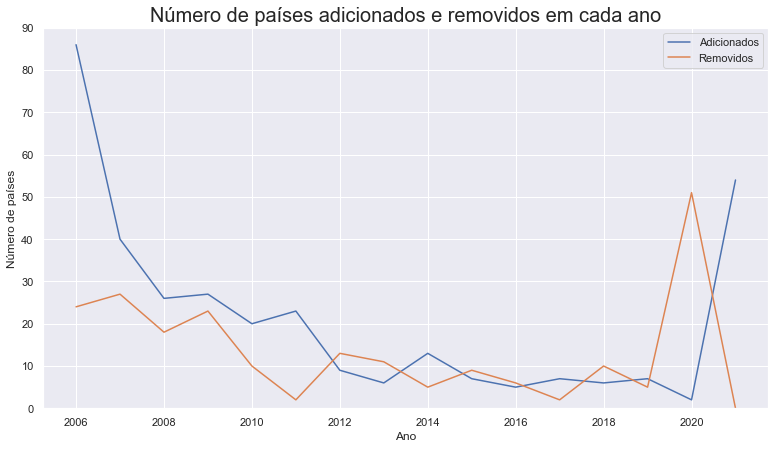

In [33]:
sns.set(rc={'figure.figsize':(13,7)})
sns.lineplot(data=result, x='year', y='n_added_countries')
sns.lineplot(data=result, x='year', y='n_absent_countries')
plt.title('Número de países adicionados e removidos em cada ano', fontsize=20)
plt.xlabel('Ano')
plt.ylabel('Número de países')
plt.legend(['Adicionados', 'Removidos'])
plt.ylim(0, 90)
plt.show()

Depois dos primeiros anos, a variação dos países é pequena, exceto pelo ano 2020.

## GDP ao longo do tempo

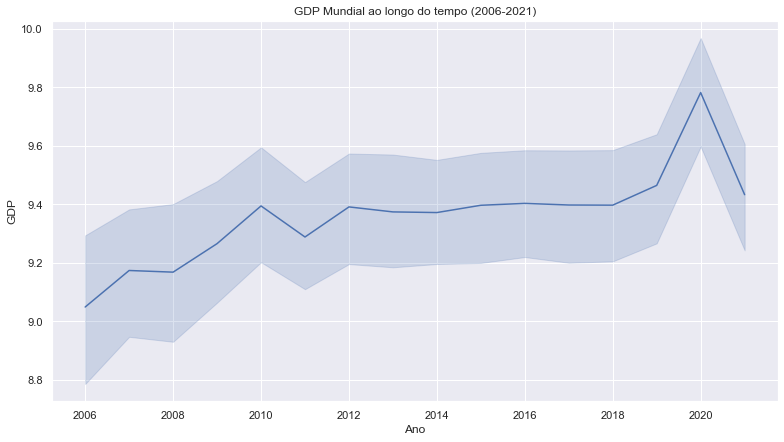

In [34]:
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='gdp')
plt.title('GDP Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('GDP')
plt.show()

Com poucas variações, o GDP mundial se manteve estável entre 2010 e 2019. Antes disso eram poucos países e o ano de 2020 também teve menos países na pesquisa.

**Um dos fatores com maior correlação com o score (o GDP) teve um impacto inverso pela número menor de países na pesquisa. Com isso, relações com a pandemia são complicadas de fazer.**

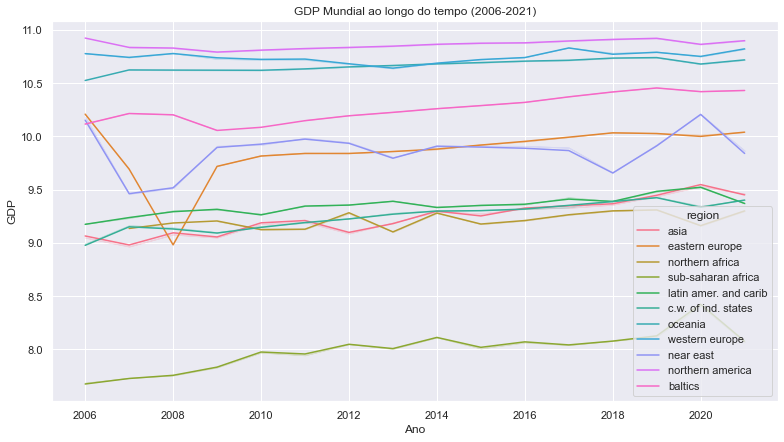

In [35]:
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='gdp', hue='region', ci=0, legend='brief')
plt.title('GDP Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('GDP')
plt.show()

Há uma leve tendência geral de crescimento para as regiões abaixo de 10.5. Por curiosidade como está o Brasil comparado à sua região e com o mundo?

In [36]:
brazil_gdp = dataset[dataset['country']=='brazil'][['year','gdp']]
brazil_gdp['name'] = 'brazil'
lat_america_gdp = dataset[dataset['region']=='latin amer. and carib'].query("country != 'brazil'")[['year','gdp']]
lat_america_gdp['name'] = 'latin america'
brazil_vs_america_gdp = brazil_gdp.append(lat_america_gdp, ignore_index=True)


C:\Users\salat\AppData\Local\Temp/ipykernel_38924/751941796.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brazil_vs_america_gdp = brazil_gdp.append(lat_america_gdp, ignore_index=True)


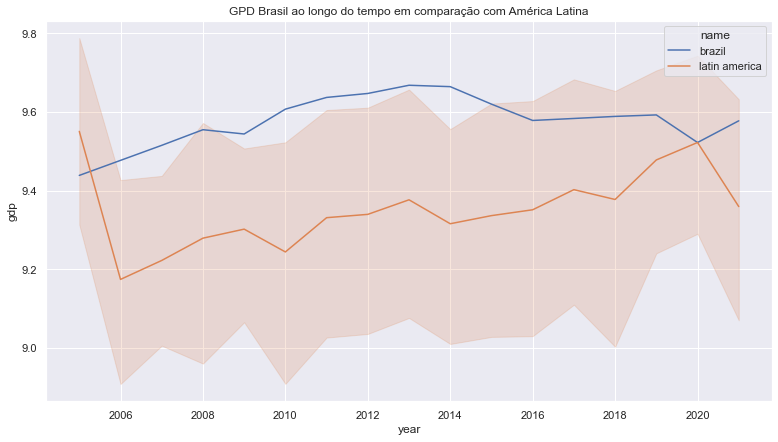

In [37]:
sns.lineplot(data=brazil_vs_america_gdp, x='year', y='gdp', hue='name')
plt.title('GPD Brasil ao longo do tempo em comparação com América Latina')
plt.show()

## O papel do social support

1. Relação entre social_support e score


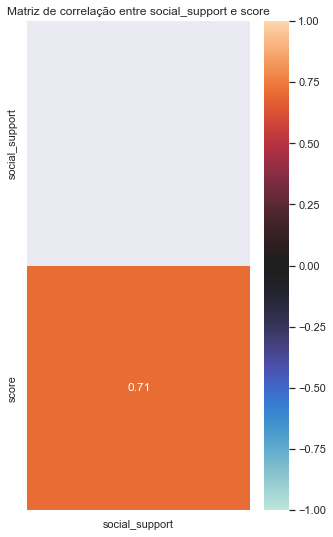

In [38]:
df = pd.DataFrame(dataset, columns=['social_support', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})
sns.heatmap(df.corr()[['social_support']].sort_values(by=['social_support'], ascending=False), annot=True, vmin=-1, vmax=1, center=0, mask=np.triu(df.corr()[['social_support']].sort_values(by=['social_support'], ascending=False)))

plt.title('Matriz de correlação entre social_support e score')
plt.show()

Há uma tendência de correlação entre os dois atributos. Já que a segurança de ter alguém que irá apoiar em caso de necessidade possa vir ser um fator positivo.

2. Relação entre social_support e região do mundo

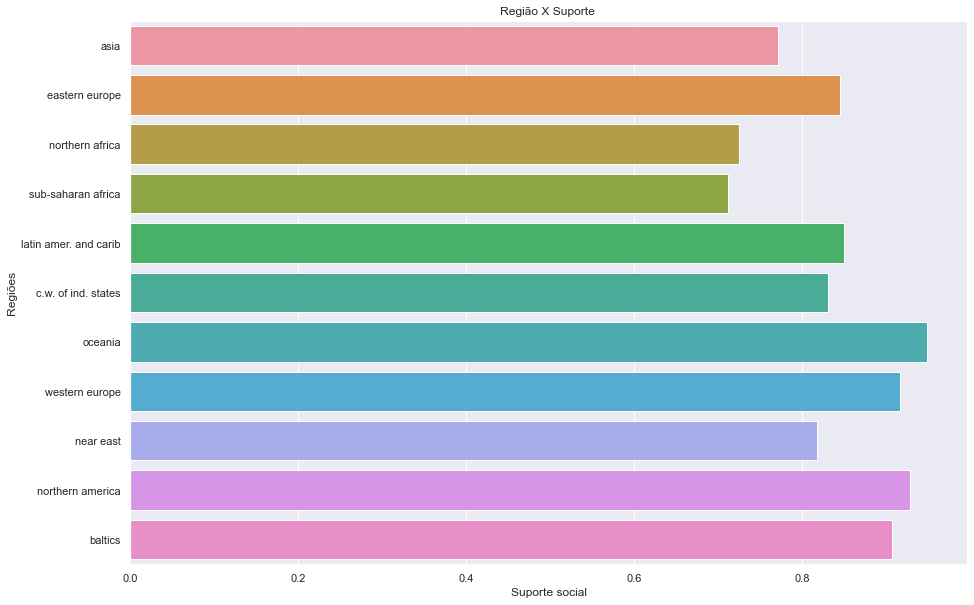

In [39]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.barplot(x="social_support", y="region", data=dataset, ci = None)
plt.title('Região X Suporte ')
plt.ylabel('Regiões')
plt.xlabel('Suporte social')
plt.show()



Mais da metade das regiões acreditam que tem pessoas com que possam contar em caso de necessidade

3. Social_support (total e por região) ao longo do tempo

Mundial

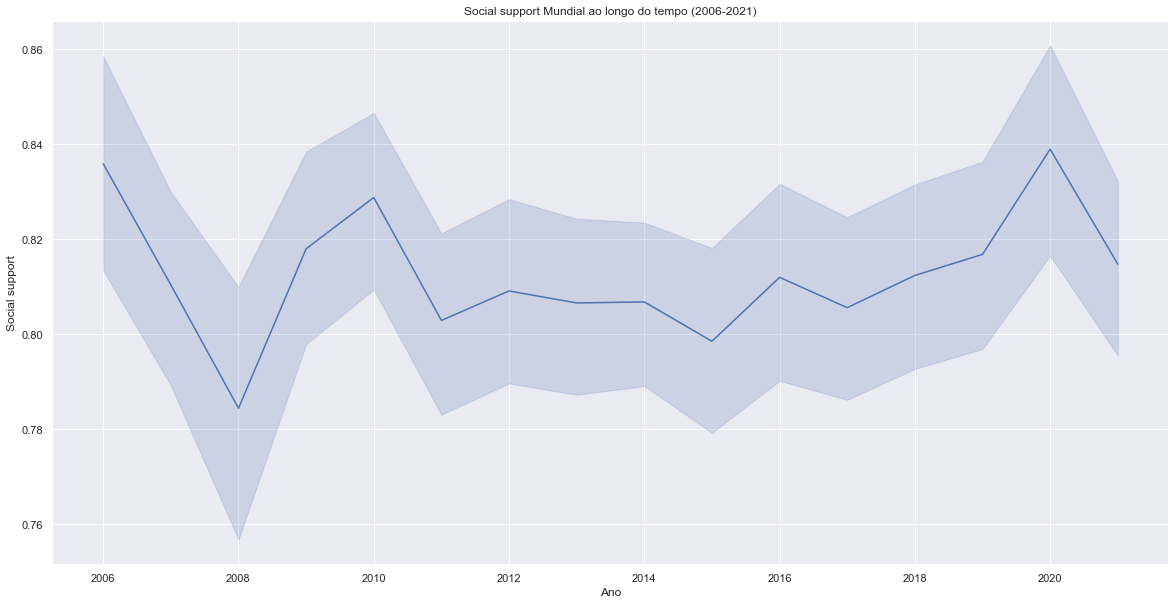

In [40]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='social_support')
plt.title('Social support Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('Social support')
plt.show()

Há pouca ocilação ao longo do ano, tendo rompido a minima apenas em 2008 (possivelmente pela crise de 2008) e 2015.

Por região

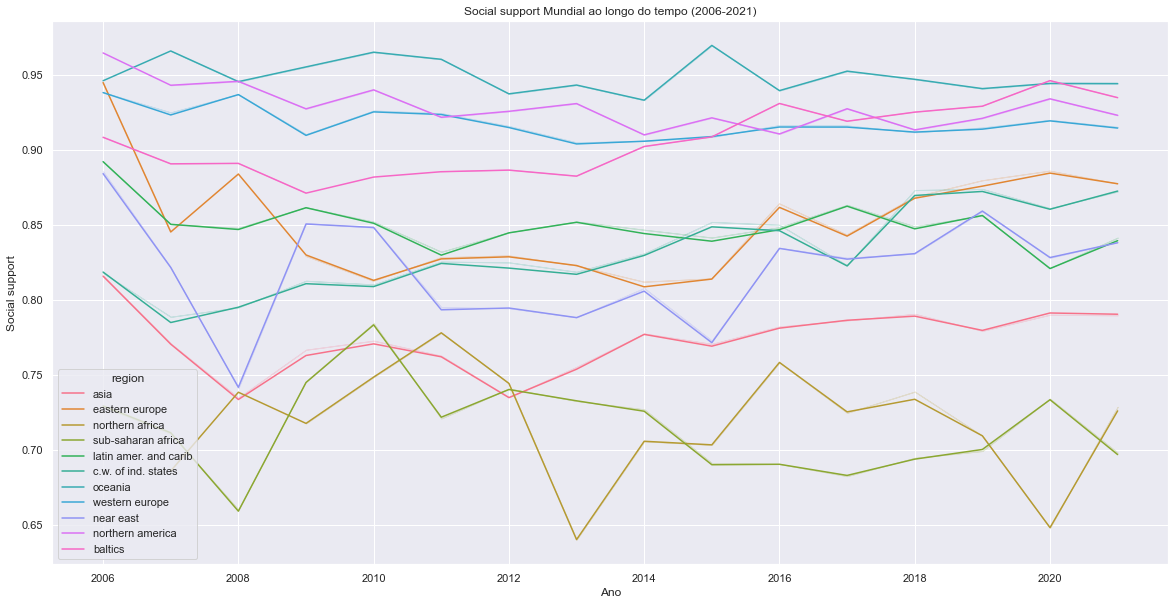

In [41]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='social_support', hue='region', ci=0, legend='brief')
plt.title('Social support Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('Social support')
plt.show()

## HLE (healthy life expectancy)

* Relação entre hle e score

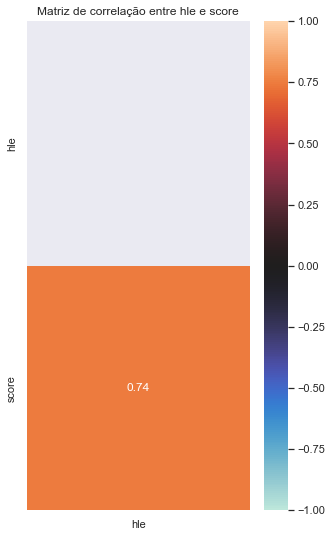

In [42]:
df = pd.DataFrame(dataset, columns=['hle', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})
sns.heatmap(df.corr()[['hle']].sort_values(by=['hle'], ascending=False), annot=True, vmin=-1, vmax=1, center=0, mask=np.triu(df.corr()[['hle']].sort_values(by=['hle'], ascending=False)))

plt.title('Matriz de correlação entre hle e score')
plt.show()

Parece apresentar uma relação positiva entre esses dois elementos indicando a possibilidade de uma expectativa maior de vida aumentar o score

* Relação entre hle e região do mundo


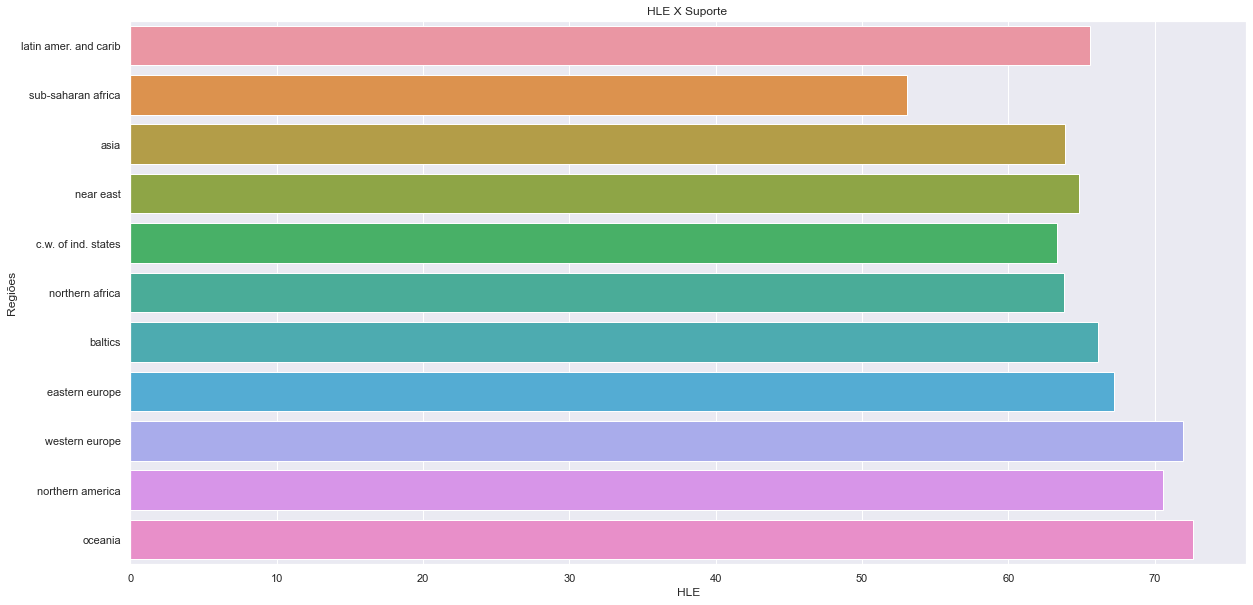

In [43]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="hle", y="region", data=dataset.sort_values(by=['hle'], ascending=True), ci = None)
plt.title('HLE X Suporte ')
plt.ylabel('Regiões')
plt.xlabel('HLE')
plt.show()


Regiões com mais poder aquisitivo parece ter uma vantagem perante os mais sub-desenvolvidos.

* hle (total e por região) ao longo do tempo

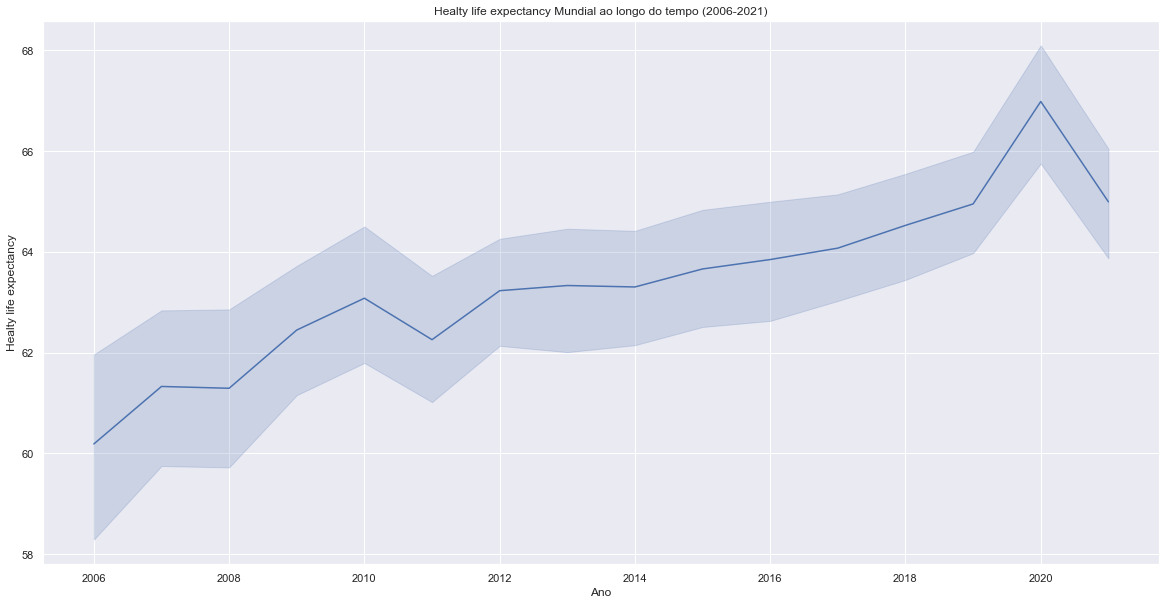

In [44]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='hle')

plt.title('Healty life expectancy Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('Healty life expectancy')
plt.show()

A linha de tendência de alta pode ser representada pelo avanço na medicina, acesso a medicações e exercicios regulares virem a se tornar populares nas classes mais baixas

## FREEDOM

* Relação entre freedom e score

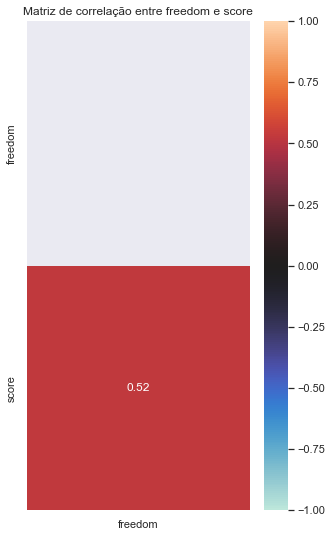

In [45]:
df = pd.DataFrame(dataset, columns=['freedom', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})
sns.heatmap(df.corr()[['freedom']].sort_values(by=['freedom'], ascending=False), annot=True, vmin=-1, vmax=1, center=0, mask=np.triu(df.corr()[['freedom']].sort_values(by=['freedom'], ascending=False)))

plt.title('Matriz de correlação entre freedom e score')
plt.show()


Liberdade tem um alto impacto no atributo positive_affect, o que pode fazer com que o score baixe

* Relação entre freedom e região do mundo

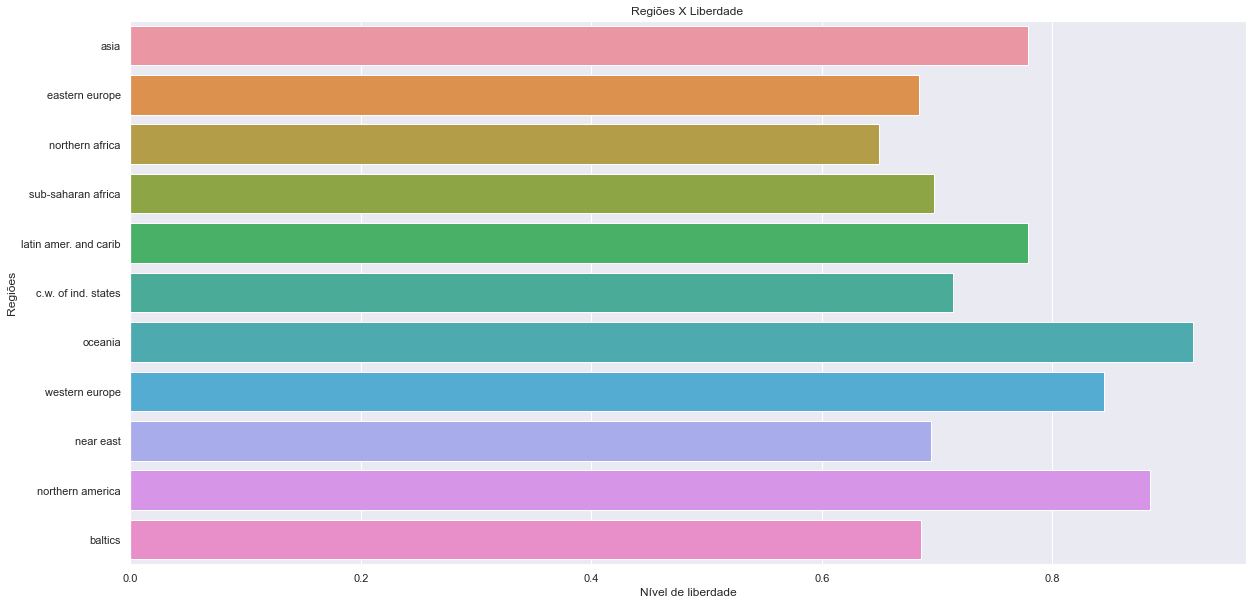

In [46]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="freedom", y="region", data=dataset, ci = None)
plt.title('Regiões X Liberdade ')
plt.ylabel('Regiões')
plt.xlabel('Nível de liberdade')
plt.show()


O nivel de liberdade independentemente da região, tem um valor satisfatório, sendo apenas regiões consideradas "mais democraticas" rompendo a pontuação de 0.8

* freedom (total e por região) ao longo do tempo

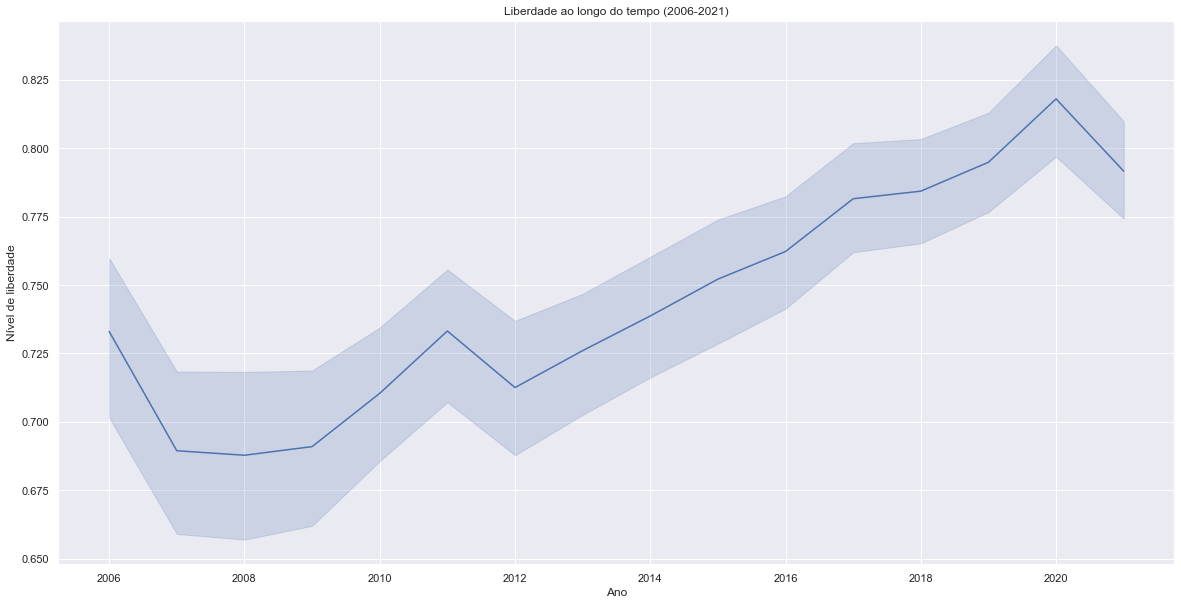

In [47]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='freedom')

plt.title('Liberdade ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('Nível de liberdade')
plt.show()

Parece que a a pontuação de liberdade cai quando há crises econômicas como em 2008 e 2012. Além de 2021 com a pandemia

## Generosity

* Relação entre generosity e score

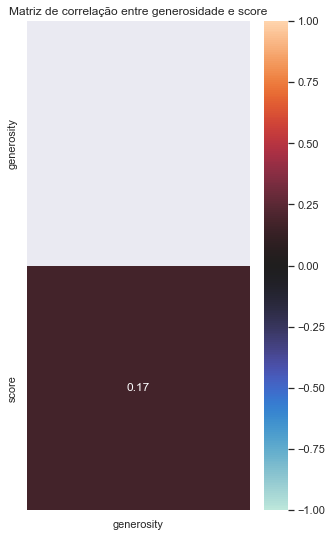

In [48]:
df = pd.DataFrame(dataset, columns=['generosity', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})

sns.heatmap(
  df.corr()[['generosity']].sort_values(
    by=['generosity'],
    ascending=False
  ),
  annot=True,
  vmin=-1,
  vmax=1,
  center=0,
  mask=np.triu(df.corr()[['generosity']].sort_values(
    by=['generosity'],
    ascending=False
    )
  )
)

plt.title('Matriz de correlação entre generosidade e score')
plt.show()

Aparentemente não há relação entre os atributos de `generosoty` e `score`

* Relação entre generosity e região do mundo

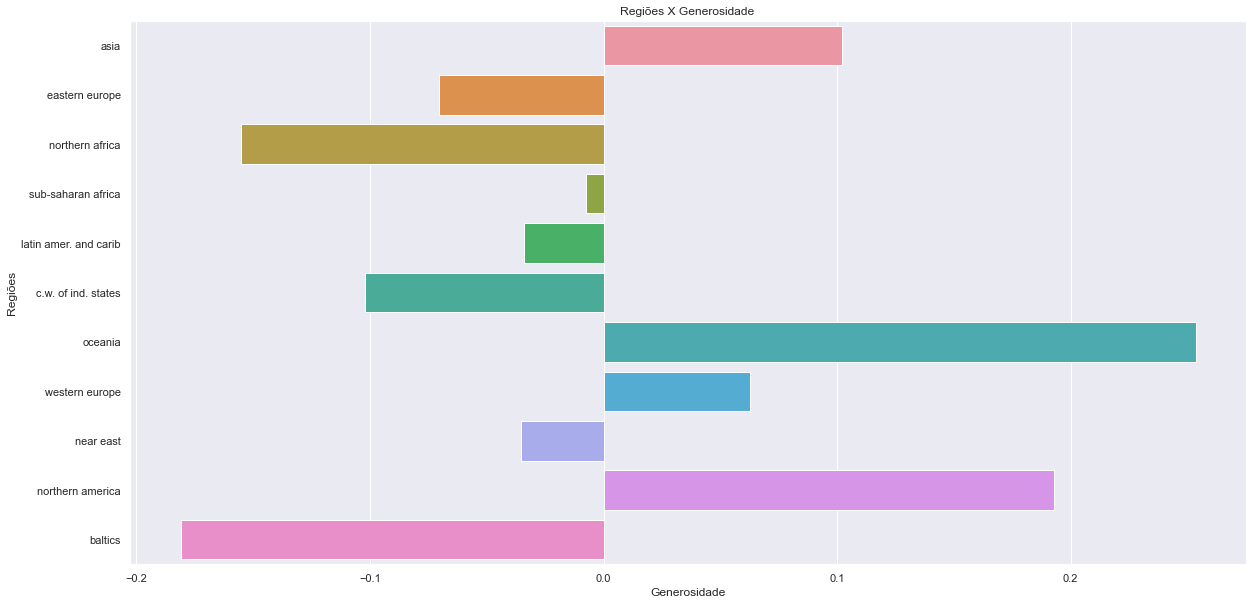

In [49]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.barplot(x="generosity", y="region", data=dataset, ci = None)

plt.title('Regiões X Generosidade ')

plt.ylabel('Regiões')
plt.xlabel('Generosidade')

plt.show()

Em termos de generosidade menos da metade tem o costume de doar a instituições de caridade

* generosity (total e por região) ao longo do tempo

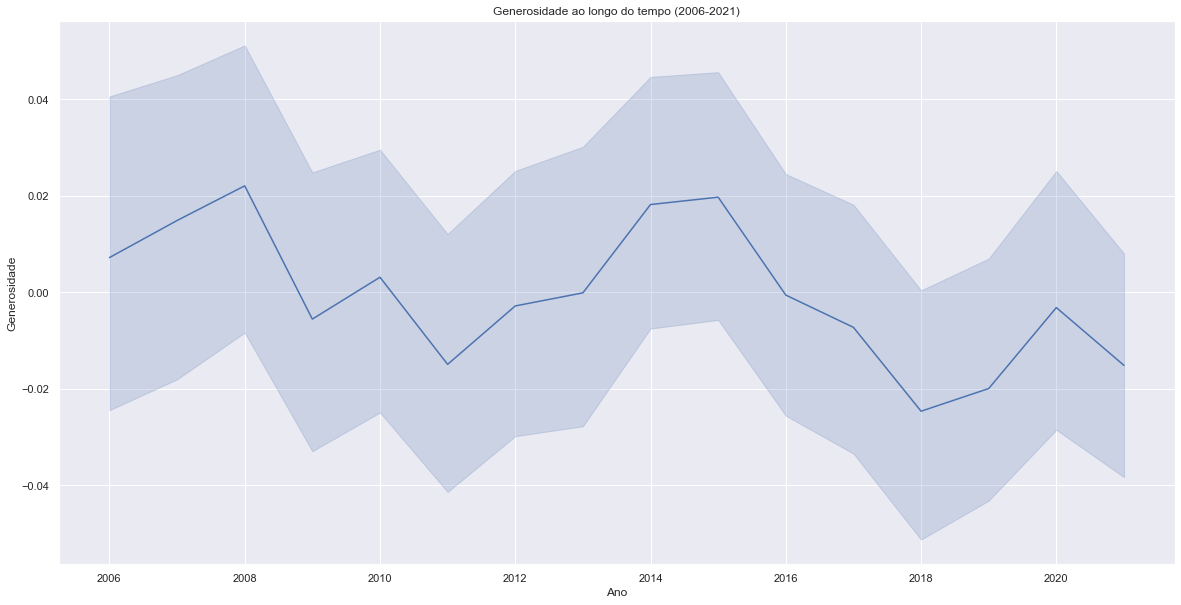

In [50]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='generosity')

plt.title('Generosidade ao longo do tempo (2006-2021)')

plt.xlabel('Ano')
plt.ylabel('Generosidade')

plt.show()

Sendo um atributo que nunca teve altos indices, mesmo com o ano de 2015 batendo na linha de tendencia de alta o indice praticamente baixou ao longo dos anos

## Corruption

* Relação entre corruption e score

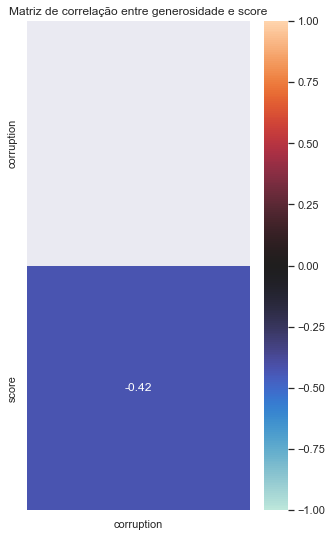

In [51]:
df = pd.DataFrame(dataset, columns=['corruption', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})

sns.heatmap(
  df.corr()[['corruption']].sort_values(
    by=['corruption'],
    ascending=False
  ),
  annot=True,
  vmin=-1,
  vmax=1,
  center=0,
  mask=np.triu(df.corr()[['corruption']].sort_values(
    by=['corruption'],
    ascending=False
    )
  )
)

plt.title('Matriz de correlação entre generosidade e score')
plt.show()

Aparentemente não há relação entre os atributos de `corruption` e `score`

* Relação entre corruption e região do mundo

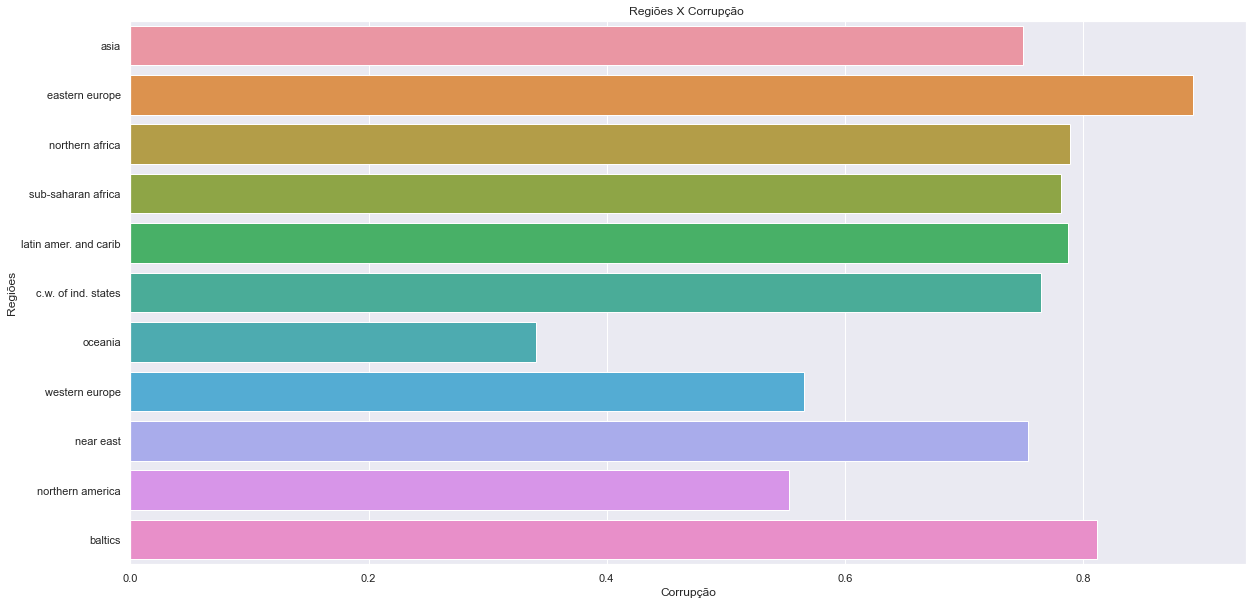

In [52]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.barplot(
  x="corruption",
  y="region",
  data=dataset,
  ci = None,
  # TODO: order
)

plt.title('Regiões X Corrupção ')

plt.ylabel('Regiões')
plt.xlabel('Corrupção')

plt.show()

Indices altos em praticamente todas as regiões, tendo apenas a oceania abaixo de 0.5, talvez pela quantidade de países o indice seja prejudicado diante dos demais

* corruption (total e por região) ao longo do tempo

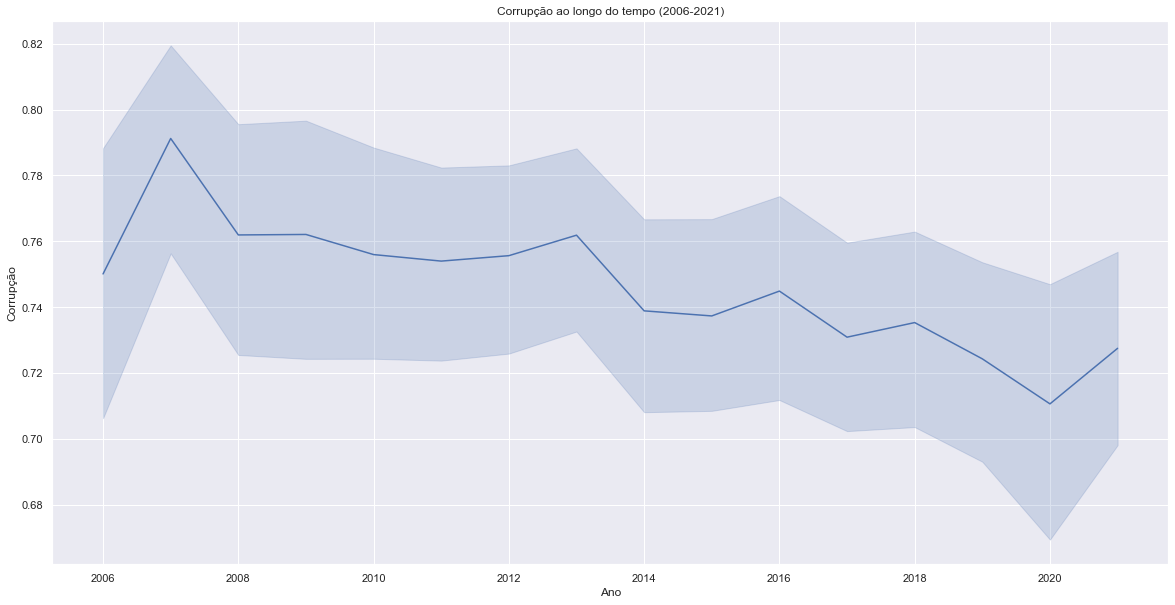

In [53]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='corruption')

plt.title('Corrupção ao longo do tempo (2006-2021)')

plt.xlabel('Ano')
plt.ylabel('Corrupção')

plt.show()

Não faz sentindo esse atributo cair com o passar do tempo, uma explicação seria um desentendimento da população perante aos seus governantes

## Positive affect

* Relação entre positive_affect e score

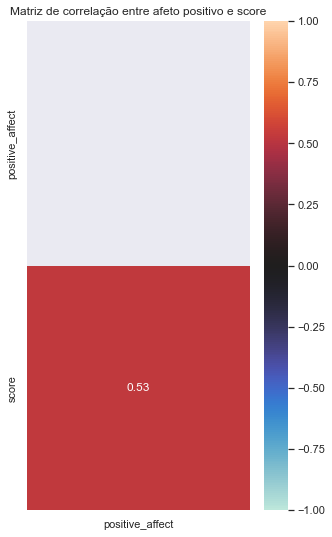

In [54]:
df = pd.DataFrame(dataset, columns=['positive_affect', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})

sns.heatmap(
  df.corr()[['positive_affect']].sort_values(
    by=['positive_affect'],
    ascending=False
  ),
  annot=True,
  vmin=-1,
  vmax=1,
  center=0,
  mask=np.triu(df.corr()[['positive_affect']].sort_values(
    by=['positive_affect'],
    ascending=False
    )
  )
)

plt.title('Matriz de correlação entre afeto positivo e score')
plt.show()

A correlação entre esse dois atributos é positiva mas fraca

* Relação entre positive_affect e região do mundo

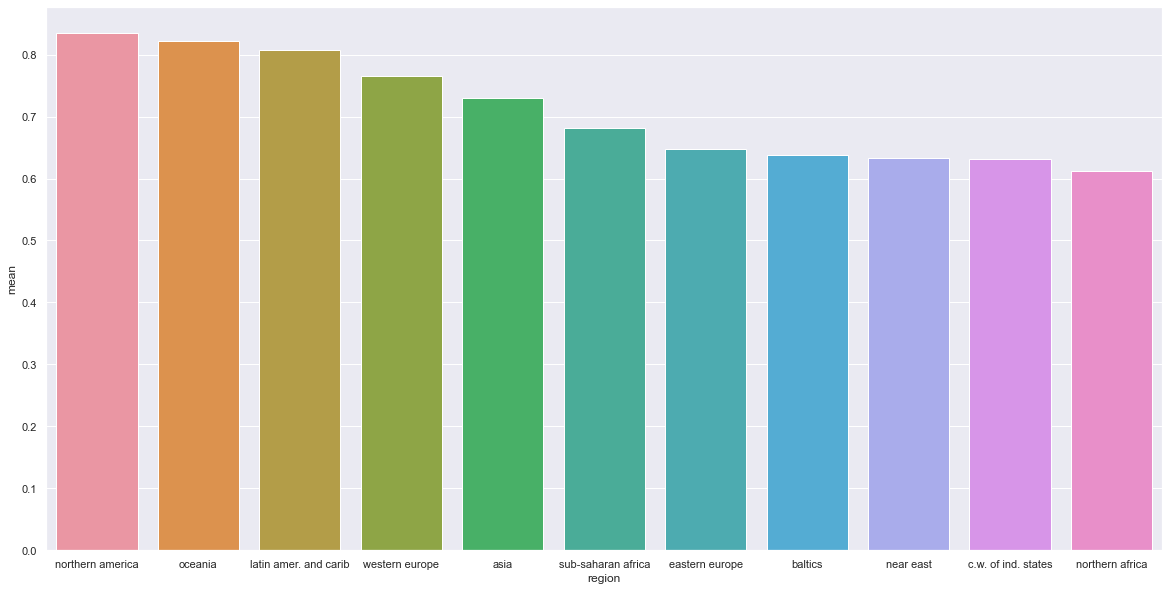

In [55]:
sns.set(rc={"figure.figsize":(20, 10)})
region_affect = pd.DataFrame(dataset.groupby('region').describe()['positive_affect']['mean']).reset_index().sort_values(by='mean', ascending=False)
sns.barplot(data=region_affect, x='region', y='mean')
plt.show()

In [56]:
sorted_values = dataset.sort_values('positive_affect')['positive_affect']

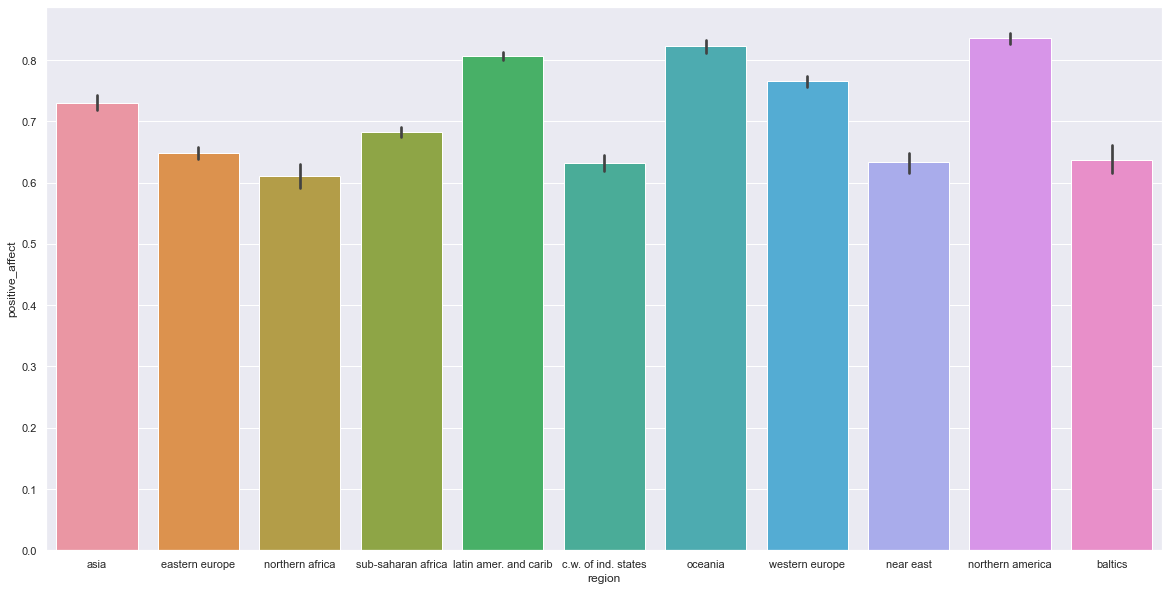

In [57]:
sns.set(rc={"figure.figsize":(20, 10)})
#region_affect = pd.DataFrame(dataset.groupby('region').describe()['positive_affect']['mean']).reset_index()
sns.barplot(data=dataset, x='region', y='positive_affect')
plt.show()

* positive_affect (total e por região) ao longo do tempo

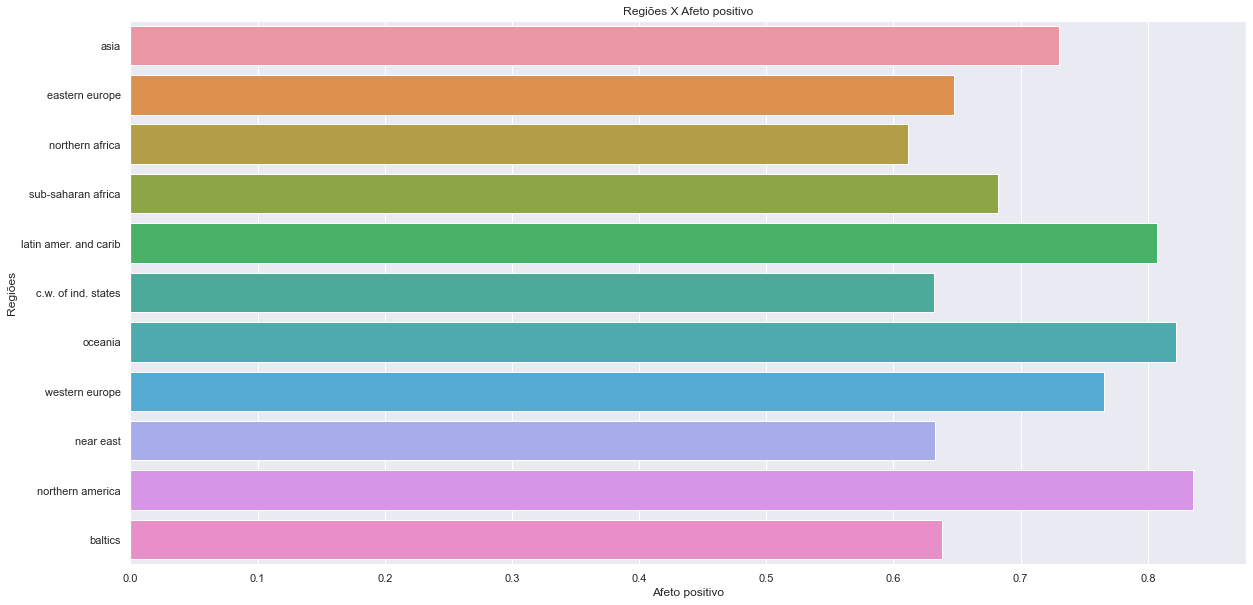

In [58]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.barplot(
  x="positive_affect",
  y="region",
  data=dataset,
  ci = None,
)

plt.title('Regiões X Afeto positivo')

plt.ylabel('Regiões')
plt.xlabel('Afeto positivo')

plt.show()

Em sua grande maioria é positivo o indicador, nenhum sendo abaixo dos 0.5

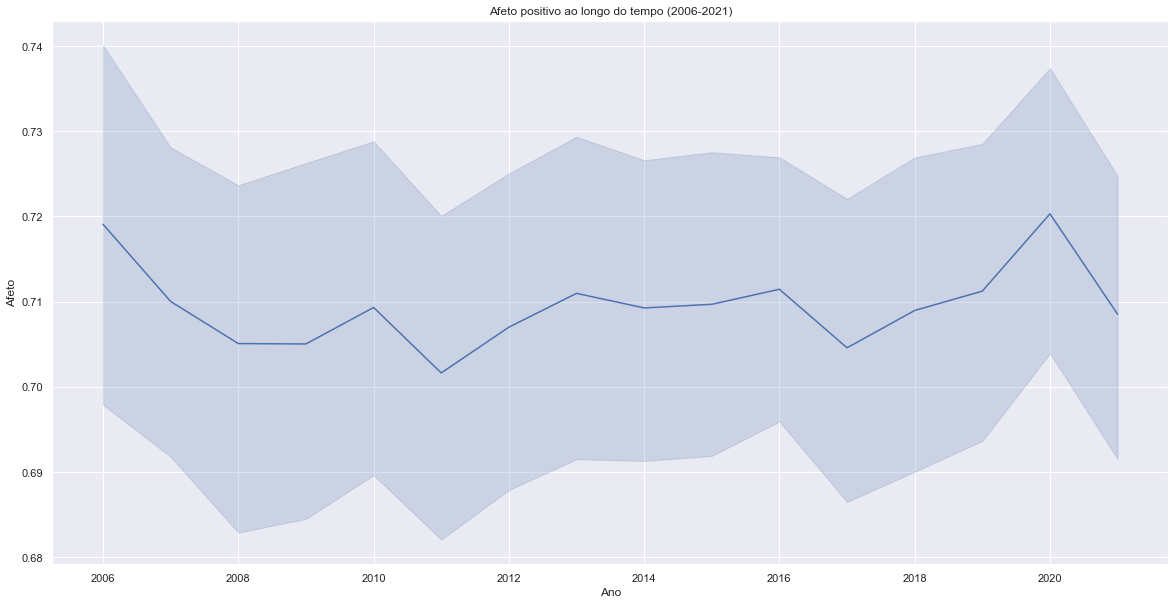

In [59]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='positive_affect')

plt.title('Afeto positivo ao longo do tempo (2006-2021)')

plt.xlabel('Ano')
plt.ylabel('Afeto')

plt.show()

Pode se dizer que apesar das pequenas flutuações, o indice se manteve ao longo do tempo

* verificar score dos países com positive_affect = 0

In [60]:
there_are_zero_values = dataset.query('positive_affect == 0')
there_are_zero_values

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year


Não a países com o atributo 0

## Negative affect

* Relação entre negative_affect e score

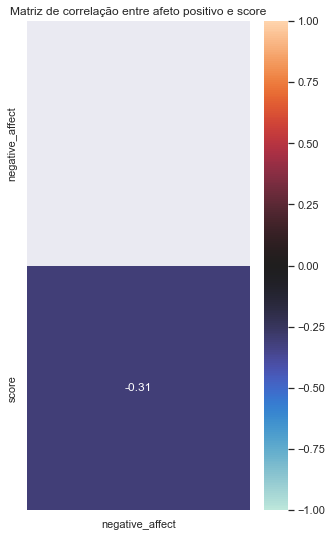

In [61]:
df = pd.DataFrame(dataset, columns=['negative_affect', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})

sns.heatmap(
  df.corr()[['negative_affect']].sort_values(
    by=['negative_affect'],
    ascending=False
  ),
  annot=True,
  vmin=-1,
  vmax=1,
  center=0,
  mask=np.triu(df.corr()[['negative_affect']].sort_values(
    by=['negative_affect'],
    ascending=False
    )
  )
)

plt.title('Matriz de correlação entre afeto positivo e score')
plt.show()

Aparentemente não há relação entre os dois atributos

* Relação entre negative_affect e região do mundo

* negative_affect (total e por região) ao longo do tempo

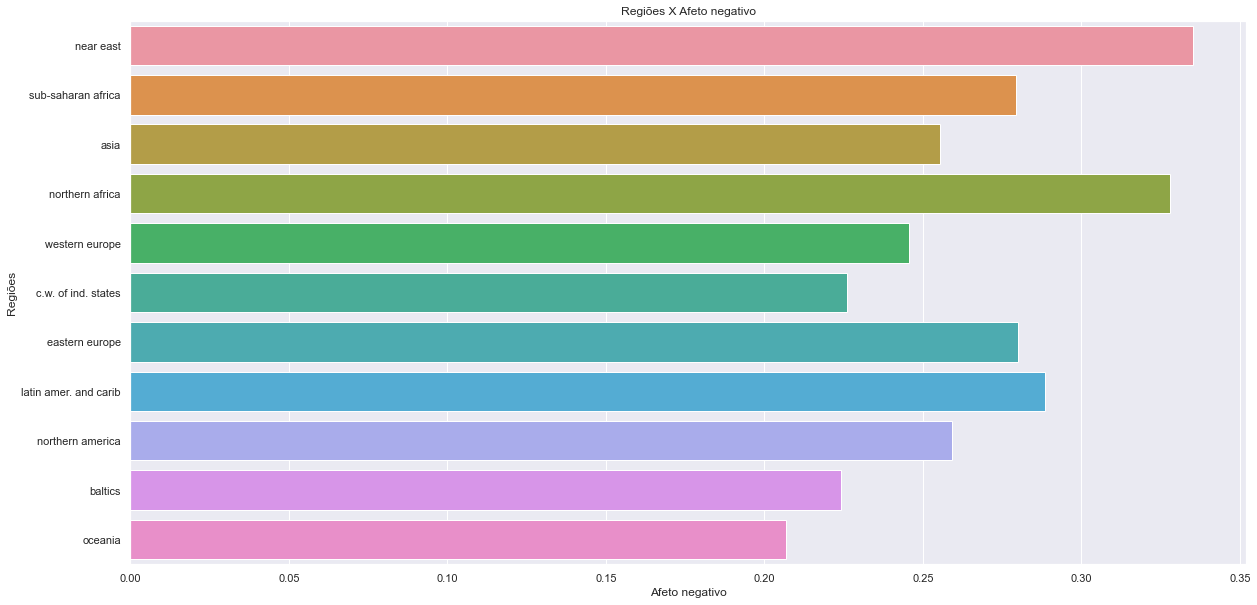

In [62]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.barplot(
  x="negative_affect",
  y="region",
  data=dataset.sort_values(by=['negative_affect'], ascending=[False]),
  ci = None
)

plt.title('Regiões X Afeto negativo')

plt.ylabel('Regiões')
plt.xlabel('Afeto negativo')

plt.show()

Em contra proposta de afeto positivo, o afeto negativo tem indices baixos. O que é bem relevante.

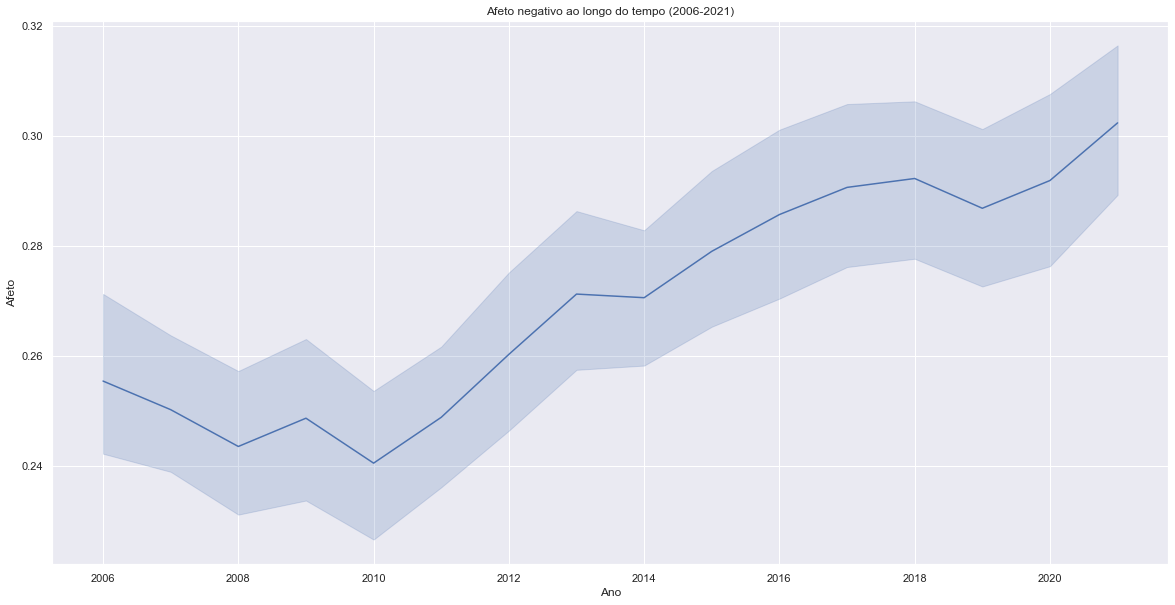

In [63]:
sns.set(rc={"figure.figsize":(20, 10)})

sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='negative_affect')

plt.title('Afeto negativo ao longo do tempo (2006-2021)')

plt.xlabel('Ano')
plt.ylabel('Afeto')

plt.show()

Mostra uma linha de tendencia de alta constante, podendo ser um indice preocupante

* verificar score dos países com negative_affect = 0 e analisar se são os mesmos com positive_affect = 0

In [64]:
there_are_zero_values = dataset['negative_affect'].min()
there_are_zero_values

0.0827369540929794

Não há atributo com o valor 0

## Year

* quais países estão presentes em 2005. Eles estão presentes em pesquisas posteriores? Caso não talvez devam ser descartados


In [65]:
present_in_2005 = dataset.query('year == 2005')

qtd_country_in_2005 = len(present_in_2005)

present_in_2005

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
66,australia,oceania,7.340688,10.658608,0.967892,71.400002,0.934973,0.158530,0.390416,0.842648,0.238012,2005
147,belgium,western europe,7.262290,10.744605,0.934875,69.900002,0.923843,-0.153368,0.597554,0.796279,0.260380,2005
218,brazil,latin amer. and carib,6.636771,9.438417,0.882923,63.299999,0.882186,-0.071048,0.744994,0.818337,0.301780,2005
293,canada,northern america,7.418048,10.651751,0.961552,71.300003,0.957306,0.256230,0.502681,0.838544,0.233278,2005
437,czech republic,eastern europe,6.439257,10.324370,0.918759,67.000000,0.865235,-0.208342,0.900733,0.722875,0.257949,2005
449,denmark,western europe,8.018934,10.851397,0.972372,69.599998,0.971135,0.030109,0.236522,0.859549,0.153672,2005
498,egypt,northern africa,5.167754,9.035634,0.847842,59.700001,0.817362,-0.182114,0.794778,0.734863,0.345555,2005
564,france,western europe,7.093393,10.641690,0.940338,71.300003,0.894819,-0.146519,0.687851,0.768988,0.225094,2005
606,germany,western europe,6.619550,10.689224,0.963490,70.199997,0.846624,0.010640,0.781007,0.775692,0.197262,2005
636,greece,western europe,6.006310,10.461699,0.836539,70.500000,0.734172,-0.288153,0.860563,0.691998,0.263643,2005


Sim, são países presentes em pesquisas posteriores.

* Quantos países novos entram e quantos são ignorados nas pesquisas do ano seguinte?

In [66]:
present_in_2006 = dataset.query('year == 2006')
qtd_country_in_2006 = len(present_in_2006)

present_in_2006

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
37,argentina,latin amer. and carib,6.312925,9.941642,0.938463,66.820000,0.733004,-0.156675,0.851799,0.824682,0.328230,2006
52,armenia,c.w. of ind. states,4.289311,9.043633,0.681877,64.800003,0.520198,-0.231024,0.849513,0.494121,0.469419,2006
80,austria,western europe,7.122211,10.841940,0.936350,70.760002,0.941382,0.302386,0.490111,0.823105,0.173812,2006
93,azerbaijan,c.w. of ind. states,4.727871,9.170049,0.854415,61.880001,0.771528,-0.234837,0.774117,0.511688,0.275695,2006
118,bangladesh,asia,4.318909,7.782841,0.672002,59.020000,0.611664,0.068273,0.785916,0.599945,0.320793,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
1866,uzbekistan,c.w. of ind. states,5.232322,8.192730,0.903067,61.439999,0.784301,-0.115492,0.608808,0.727946,0.195058,2006
1880,venezuela,latin amer. and carib,6.525146,9.459522,0.946310,65.459999,0.798281,-0.031057,0.646171,0.858956,0.178483,2006
1894,vietnam,asia,5.293660,8.334977,0.887664,65.860001,0.885792,0.014574,0.796421,0.682261,0.203979,2006
1920,zambia,sub-saharan africa,4.824455,7.817309,0.797665,44.259998,0.720972,-0.005999,0.785281,0.700788,0.226278,2006


Quantidade de novos países nas pesquisas

In [67]:
country_count_in_2005 = "{count} presentes em 2005".format(count = qtd_country_in_2005)
country_count_in_2006 = "{count} em 2006".format(count = qtd_country_in_2006)
new_country_count = "{count} novos países.".format(count = qtd_country_in_2006 - qtd_country_in_2005)

result = new_country_count + ' Sendo ' + country_count_in_2005 + ' e ' + country_count_in_2006

result

'62 novos países. Sendo 27 presentes em 2005 e 89 em 2006'

Países de 2005 encontrados no ano de 2006

In [68]:
mergedCountries = pd.merge(present_in_2006, present_in_2005, on=['country'], how='inner')
mergedCountries

,country,region_x,score_x,gdp_x,social_support_x,hle_x,freedom_x,generosity_x,corruption_x,positive_affect_x,...,score_y,gdp_y,social_support_y,hle_y,freedom_y,generosity_y,corruption_y,positive_affect_y,negative_affect_y,year_y
0,france,western europe,6.582700,10.658916,0.943929,71.480003,0.789121,0.126045,0.699270,0.777402,...,7.093393,10.641690,0.940338,71.300003,0.894819,-0.146519,0.687851,0.768988,0.225094,2005
1,lebanon,near east,4.653104,9.567953,0.853151,64.720001,0.670194,0.069380,0.901960,0.548371,...,5.491245,9.565474,0.796278,64.599998,0.703206,-0.073466,0.945177,0.584244,0.292150,2005
2,venezuela,latin amer. and carib,6.525146,9.459522,0.946310,65.459999,0.798281,-0.031057,0.646171,0.858956,...,7.169621,9.313096,0.955278,65.400002,0.838198,-0.168757,0.719800,0.819065,0.233014,2005


* Presença das regiões nas pesquisas ao longo do ano?

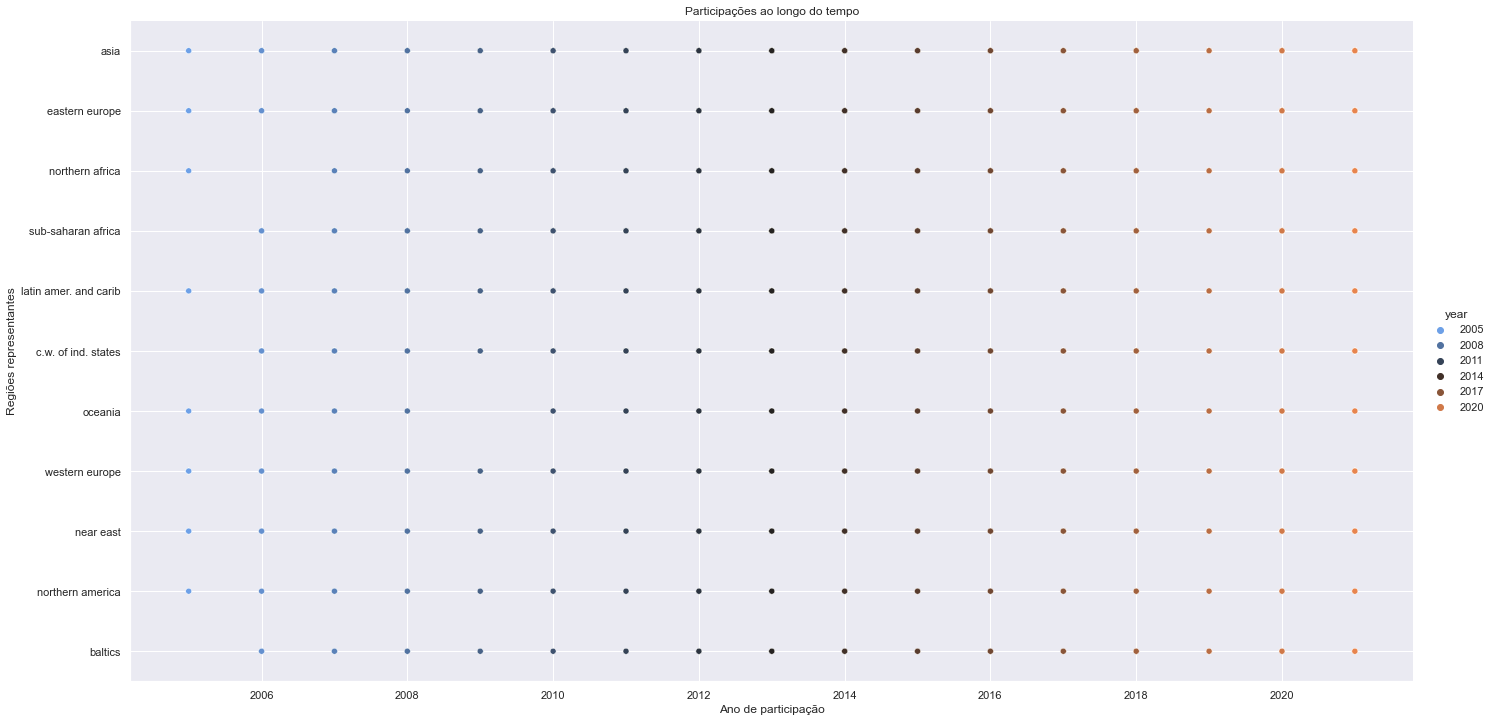

In [69]:
sns.relplot(
  data=dataset,
  x="year",
  y="region",
  height=10,
  aspect=2,
  hue="year",
  palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
)

plt.title('Participações ao longo do tempo')

plt.ylabel('Regiões representantes')
plt.xlabel('Ano de participação')

plt.show()

Aparentemente houveram regiões não participantes apenas no início das pesquisas

* Como é a representação das regiões do mundo ao longo do tempo?

* Qual o score médio ao longo do tempo?

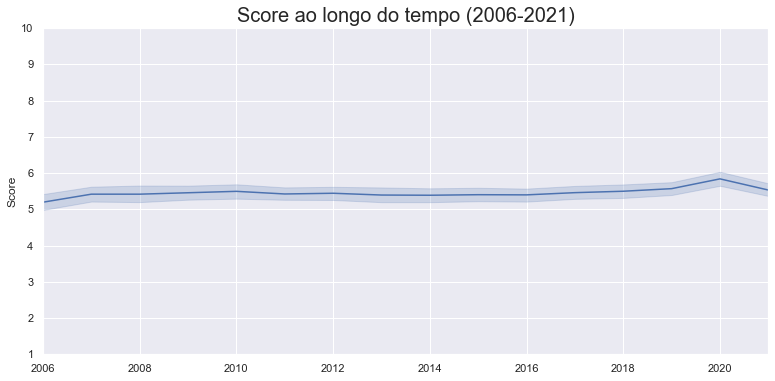

In [ ]:
sns.set(rc={"figure.figsize":(13, 6)})

sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='score')

plt.title('Score ao longo do tempo (2006-2021)', fontsize=20)

plt.xlabel('')
plt.ylabel('Score')
plt.xlim(2006, 2021)
plt.ylim(1, 10)

plt.show()


O score se manteve na mesma escala por um bom tempo, e o que provavelmente baixou novamente foi a pandemia